In [1]:
%matplotlib notebook
import numpy as np
import finite
import timesteppers
import equations
import time
from scipy import sparse
from scipy import stats
from scipy.sparse import linalg as spla
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors
from IPython.display import HTML

In [2]:
# measure variance at each sample sizes
def measure(u,l):
    v_array = np.zeros(l-1)
    for index_l in range(l-1):
        temp_v = 0
#       16X16 256  side-by-side samples
        gap = int(resolution/16)
        for i in range(16):
            for j in range(16):
                temp_v += np.var(u[i*gap:i*gap+l_array[index_l],j*gap:j*gap+l_array[index_l]])
        v_array[index_l] = temp_v/(16**2)
    return v_array

## KPZ equation
\begin{equation}
\frac{\partial h(x,y,t)}{\partial t} = \nu\nabla^2 h + \frac{\lambda}{2}(\nabla h)^2 + \eta(x,y,t)
\\\frac{\partial h(x,y,t)}{\partial t} - \partial^2_x h - \partial^2_y h = (\partial_x h)^2 + (\partial_y h)^2 + \eta(x,y,t)
\end{equation}

In [37]:
import time
# dx = 1, L = 64 or 128
resolution = 64
grid_x = finite.UniformPeriodicGrid(resolution, resolution)
grid_y = finite.UniformPeriodicGrid(resolution, resolution)
domain = finite.Domain((grid_x, grid_y))
x, y = domain.values()
xm, ym = domain.plotting_arrays()
dt = 0.04
iter_total = 10**5
u = np.zeros(domain.shape)
# nu = 0.5, lambda = 25
kpz_problem = equations.KPZ(u, 8, domain, 0.5, 25)



print("dx =",grid_x.dx)
print("dt =", dt)
print("total iteration =",iter_total)


start = time.time()
# l_array stores sample sizes
l_max = int(np.log2(resolution))+1
l_array = np.power(2,range(1,l_max))
# v_matrix stores variance at each step
v_matrix = np.zeros((int(iter_total/1000),l_max-1))
# frames_u store landscapes at each step
frames_u = [u.copy()]
while kpz_problem.iter < iter_total:
    kpz_problem.step(dt)
#     Gaussian white noise
#     u.data += 0.1*np.sqrt(12*dt)*np.random.uniform(-0.5,0.5,size=(resolution,resolution))
    if kpz_problem.iter % 1000 == 0:
        print(kpz_problem.iter)
#         renormalize height
        mean_h = np.mean(u.data)
        u.data -= mean_h
#         take measurement every 1000 iterations
        v_matrix[int(kpz_problem.iter/1000)-1,:] = measure(u,l_max)
#         break
    if kpz_problem.iter % 500 == 0:
        mean_h = np.mean(u.data)
        u.data -= mean_h
        frames_u += [u.copy()]
end = time.time()
print(end - start)

/Users/yifanzhang/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


dx = 1.0
dt = 0.04
total iteration = 100000
apply operator dx@
apply operator dx@


/var/folders/5w/21blhrg5025ftjzlgcn1v2kw0000gn/T/ipykernel_14609/3616559300.py:44: DeprecationWarning: Assigning the 'data' attribute is an inherently unsafe operation and will be removed in the future.
  u.data -= mean_h


1000


/var/folders/5w/21blhrg5025ftjzlgcn1v2kw0000gn/T/ipykernel_14609/3616559300.py:38: DeprecationWarning: Assigning the 'data' attribute is an inherently unsafe operation and will be removed in the future.
  u.data -= mean_h


2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
122.56797885894775


## Sample simulations
3 reps on 64X64 and 3 reps on 128X128, with power law exponent measured

[ 2  4  8 16 32 64]
0.3956874796230709
0.041970048928692036


<IPython.core.display.Javascript object>


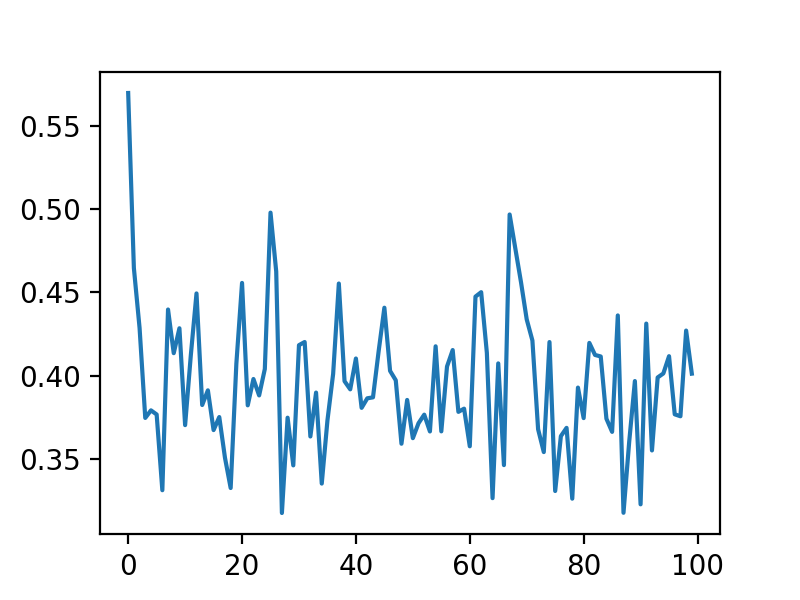

In [34]:
# 64X64, dx=1, dt=0.04, iter = 10**5, damping func v=0.5, lamda = 25, spatial_order = 8, CN+FE, rep1
from scipy import stats
steps = 100
slopes = np.zeros(steps)
print(l_array)
for i in range(steps):
    v_array = v_matrix[i,:]
    res = stats.linregress(np.log2(l_array[1:4]-1), np.log2(v_array[1:4]))
    slopes[i] = res.slope/2
print(np.mean(slopes))
print(np.std(slopes))
plt.figure(figsize=[4,3])
plt.plot(range(steps),slopes)
plt.show()

[ 2  4  8 16 32 64]
0.400795315546514
0.04061890554839119


<IPython.core.display.Javascript object>


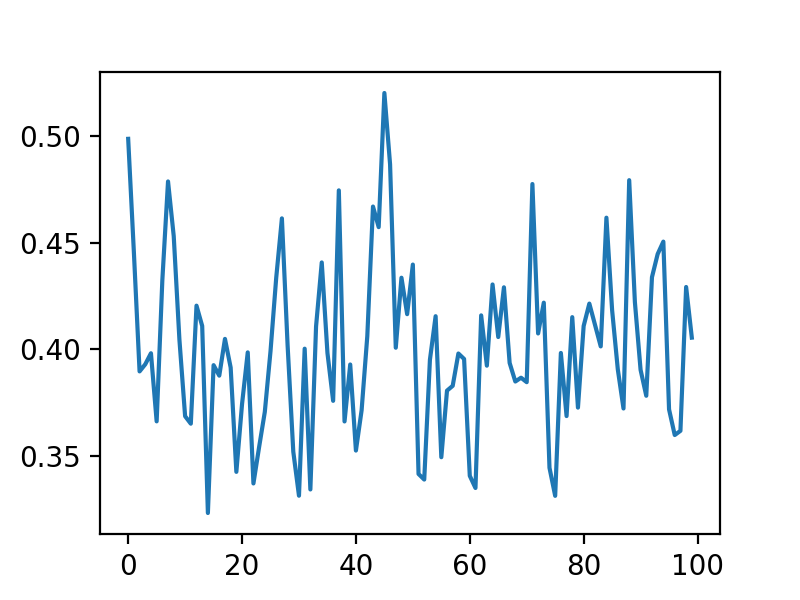

In [36]:
# 64X64, dx=1, dt=0.04, iter = 10**5, damping func v=0.5, lamda = 25, spatial_order = 8, CN+FE, rep2
from scipy import stats
steps = 100
slopes = np.zeros(steps)
print(l_array)
for i in range(steps):
    v_array = v_matrix[i,:]
    res = stats.linregress(np.log2(l_array[1:4]-1), np.log2(v_array[1:4]))
    slopes[i] = res.slope/2
print(np.mean(slopes))
print(np.std(slopes))
plt.figure(figsize=[4,3])
plt.plot(range(steps),slopes)
plt.show()

[ 2  4  8 16 32 64]
0.4101222986026862
0.049729612341565255


<IPython.core.display.Javascript object>


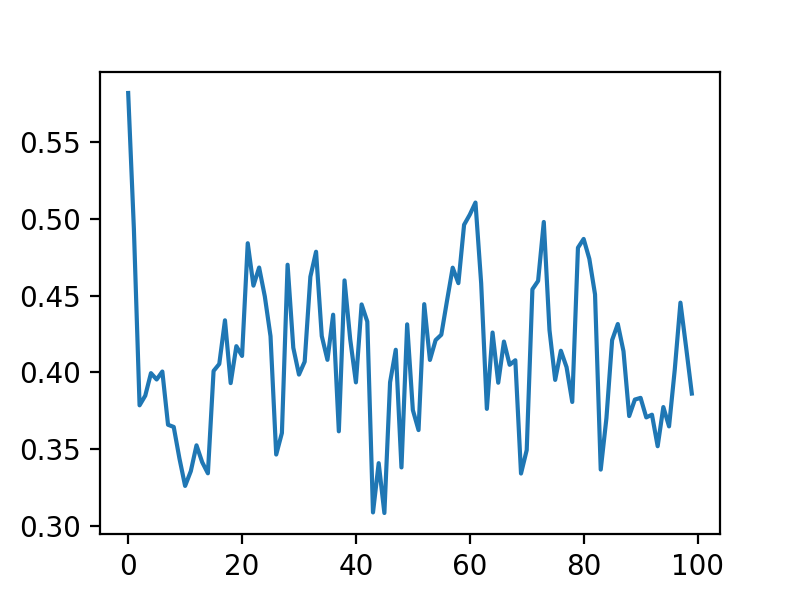

In [38]:
# 64X64, dx=1, dt=0.04, iter = 10**5, damping func v=0.5, lamda = 25, spatial_order = 8, CN+FE, rep3
from scipy import stats
steps = 100
slopes = np.zeros(steps)
print(l_array)
for i in range(steps):
    v_array = v_matrix[i,:]
    res = stats.linregress(np.log2(l_array[1:4]-1), np.log2(v_array[1:4]))
    slopes[i] = res.slope/2
print(np.mean(slopes))
print(np.std(slopes))
plt.figure(figsize=[4,3])
plt.plot(range(steps),slopes)
plt.show()

0.42445440938730916
0.024009671861735513


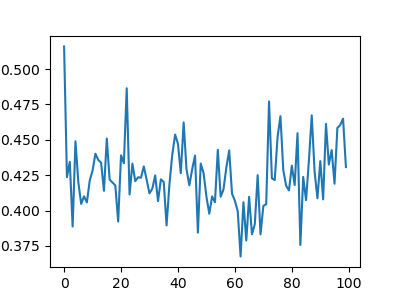

In [5]:
# 128X128, dx=1, dt=0.04 iter = 10**5, damping func v=0.5, lamda = 25, spatial_order = 8, CN(operator)+FE, rep4
from scipy import stats
steps = 100
slopes = np.zeros(steps)
for i in range(steps):
    v_array = v_matrix[i,:]
    res = stats.linregress(np.log2(l_array[1:4]-1), np.log2(v_array[1:4]))
    slopes[i] = res.slope/2
print(np.mean(slopes))
print(np.std(slopes))
plt.figure(figsize=[4,3])
plt.plot(range(steps),slopes)
plt.show()

0.4380483415601519
0.036076998565797554


<IPython.core.display.Javascript object>


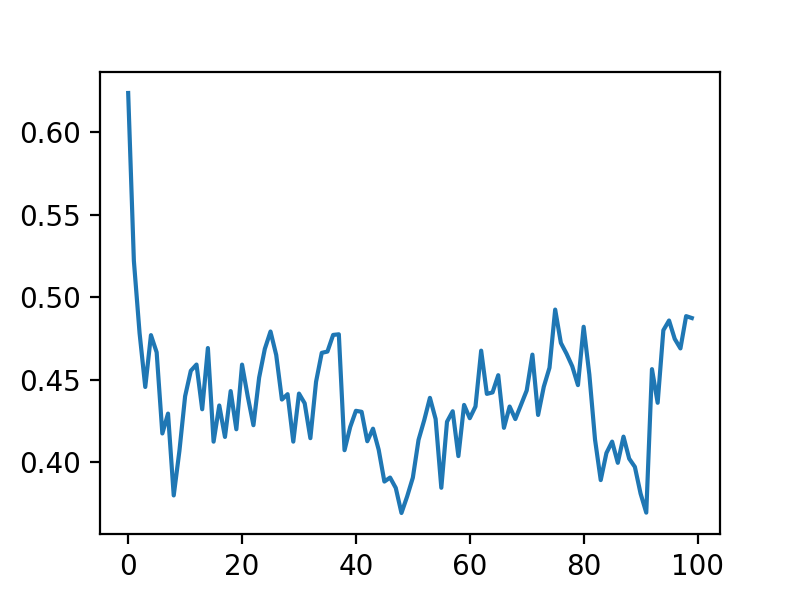

In [5]:
# 128X128, dx=1, dt=0.04 iter = 10**5, damping func v=0.5, lamda = 25, spatial_order = 8, CN(operator)+FE, rep5
from scipy import stats
steps = 100
slopes = np.zeros(steps)
for i in range(steps):
    v_array = v_matrix[i,:]
    res = stats.linregress(np.log2(l_array[1:4]-1), np.log2(v_array[1:4]))
    slopes[i] = res.slope/2
print(np.mean(slopes))
print(np.std(slopes))
plt.figure(figsize=[4,3])
plt.plot(range(steps),slopes)
plt.show()

0.4352806298666658
0.03315791284854573


<IPython.core.display.Javascript object>


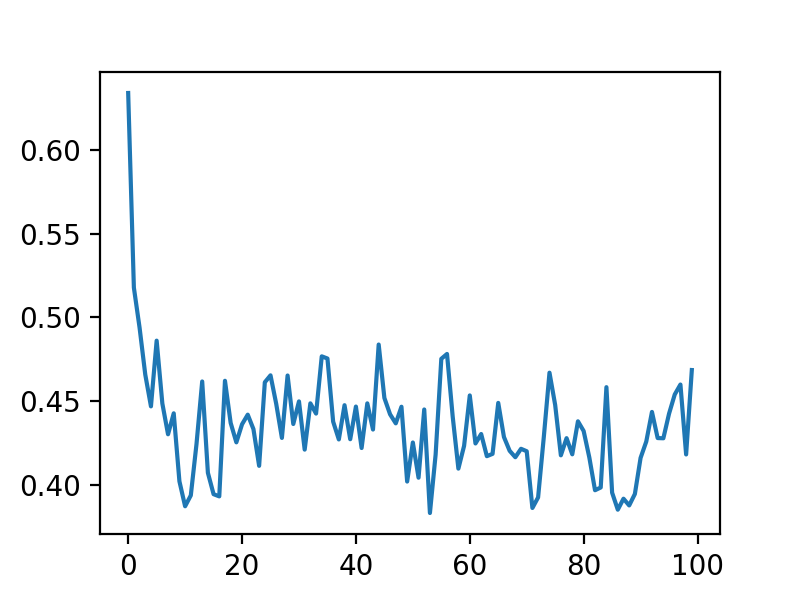

In [22]:
# 128X128, dx=1, dt=0.04 iter = 10**5, damping func v=0.5, lamda = 25, spatial_order = 8, CN(operator)+FE, rep6
from scipy import stats
steps = 100
slopes = np.zeros(steps)
for i in range(steps):
    v_array = v_matrix[i,:]
    res = stats.linregress(np.log2(l_array[1:4]-1), np.log2(v_array[1:4]))
    slopes[i] = res.slope/2
print(np.mean(slopes))
print(np.std(slopes))
plt.figure(figsize=[4,3])
plt.plot(range(steps),slopes)
plt.show()

simulation has already converged to the saturated state

<IPython.core.display.Javascript object>


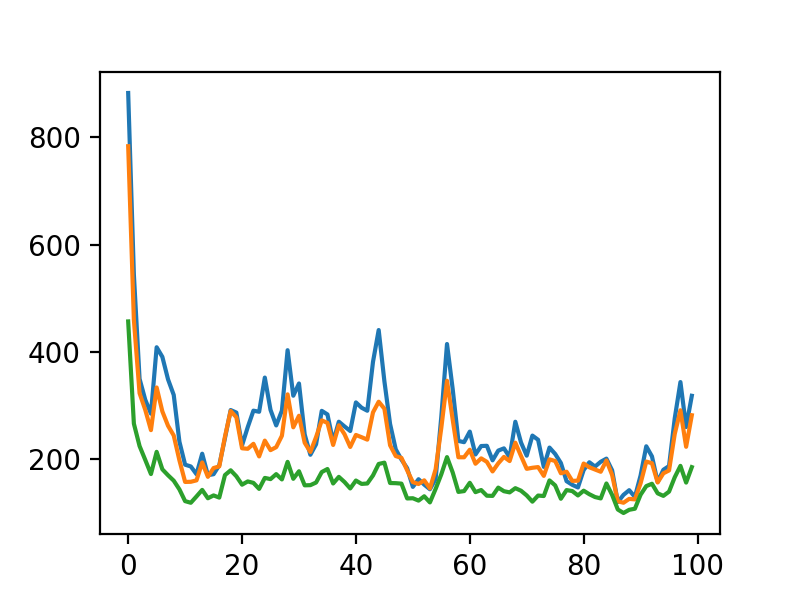

In [20]:
# var vs time
plt.figure(figsize=[4,3])
plt.plot(range(steps),v_matrix[:,-1])
plt.plot(range(steps),v_matrix[:,-2])
plt.plot(range(steps),v_matrix[:,-3])
plt.show()

<IPython.core.display.Javascript object>


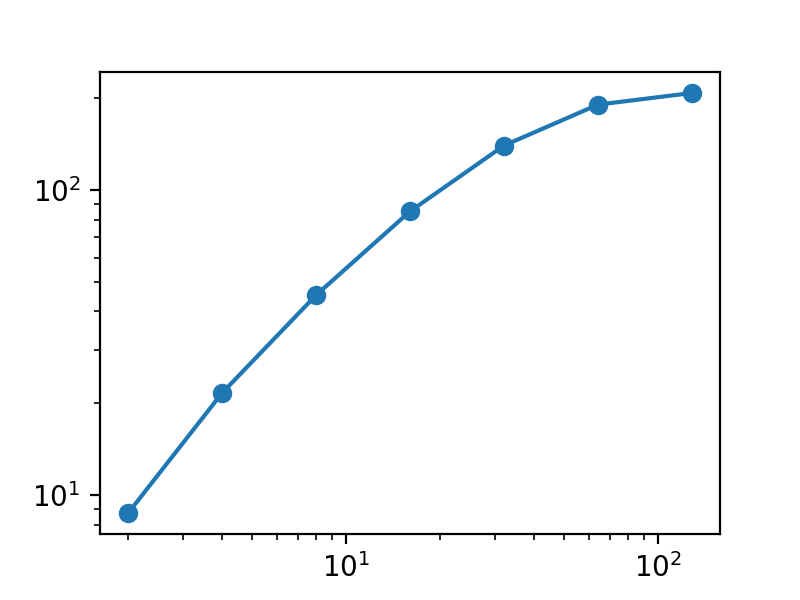

In [19]:
# var vs sample size, expect a power law relationship, i.e., a linear plot in log-log scale
plt.figure(figsize=[4,3])
v_mean = [np.mean(v_matrix[50:,i]) for i in range(l_max-1)]
plt.loglog(l_array,v_mean)
plt.scatter(l_array,v_mean)
plt.show()

## Landscape plot

In [27]:
def plot_2D_field(xm, ym, data):
    fig = plt.figure(figsize=(4,3))
    ax = fig.add_subplot(111)
    pcm = ax.pcolormesh(xm, ym, data)
    ax.set_aspect(1)
    fig.colorbar(pcm)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.tight_layout()

def plot_2D(matrix):
    lim_margin = -0.05
    fig = plt.figure(figsize=(3,3))
    ax = fig.add_subplot()
    I, J = matrix.shape
    matrix_mag = np.log10(np.abs(matrix))
    ax.pcolor(matrix_mag[::-1])
    ax.set_xlim(-lim_margin, I+lim_margin)
    ax.set_ylim(-lim_margin, J+lim_margin)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal', 'box')
    plt.tight_layout()

In [17]:
plot_2D_field(xm,ym,u.data)

<IPython.core.display.Javascript object>

## Generating gifs

<IPython.core.display.Javascript object>


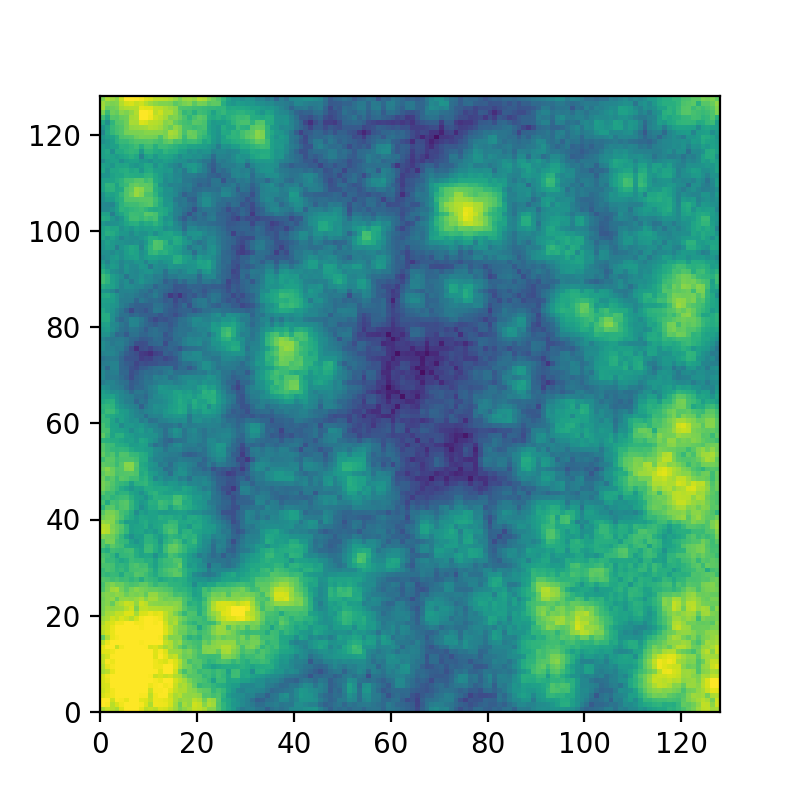

In [24]:
fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111)

max_height = np.max([frames_u])

pcm_u = ax1.pcolormesh(frames_u[0],vmin = -0.5,vmax = 0.5)

# ax1.set_xlabel('x')
# ax1.set_ylabel('y')

# ax1.set_title('u')

def init(): 
    pcm_u.set_array(frames_u[0]/max_height)
def animate(i): 
    pcm_u.set_array(frames_u[i]/max_height)

anim = animation.FuncAnimation(fig, animate, frames = len(frames_u), repeat = False, interval = 33)
writergif = animation.PillowWriter(fps=30)
anim.save('M128X128_iter100000@2.gif',writer = writergif)

## Master equation

\begin{equation}
\frac{\partial h(x,y,t)}{\partial t} = c_1\nabla^2 h + c_2(\nabla h)^2 + \sqrt{F_2+c_3\cdot(\nabla h )^2}\ \eta(x,y,t)
\end{equation}

In [29]:
import time
# dx = 1, L = 128
resolution = 128
grid_x = finite.UniformPeriodicGrid(resolution, resolution)
grid_y = finite.UniformPeriodicGrid(resolution, resolution)
domain = finite.Domain((grid_x, grid_y))
x, y = domain.values()
xm, ym = domain.plotting_arrays()
dt = 0.04
iter_total = 10**5
u = np.zeros(domain.shape)
# nu = 0.0375, lambda = 2
master_problem = equations.Master(u, 8, domain, 0.0375, 2)



print("dx =",grid_x.dx)
print("dt =", dt)
print("total iteration =",iter_total)


start = time.time()
# l_array stores sample sizes
l_max = int(np.log2(resolution))+1
l_array = np.power(2,range(1,l_max))
# v_matrix stores variance at each step
v_matrix = np.zeros((int(iter_total/1000),l_max-1))
# frames_u store landscapes at each step
frames_u = [u.copy()]
while master_problem.iter < iter_total:
    master_problem.step(dt)
#     Gaussian white noise
#     u.data += 0.1*np.sqrt(12*dt)*np.random.uniform(-0.5,0.5,size=(resolution,resolution))
    if master_problem.iter % 1000 == 0:
        print(master_problem.iter)
#         renormalize height
        mean_h = np.mean(u.data)
        u.data -= mean_h
#         take measurement every 1000 iterations
        v_matrix[int(master_problem.iter/1000)-1,:] = measure(u,l_max)
#         break
    if master_problem.iter % 500 == 0:
        mean_h = np.mean(u.data)
        u.data -= mean_h
        frames_u += [u.copy()]
end = time.time()
print(end - start)

/Users/yifanzhang/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


dx = 1.0
dt = 0.04
total iteration = 100000
apply operator dx@
apply operator dx@


/var/folders/5w/21blhrg5025ftjzlgcn1v2kw0000gn/T/ipykernel_14609/23250438.py:45: DeprecationWarning: Assigning the 'data' attribute is an inherently unsafe operation and will be removed in the future.
  u.data -= mean_h


1000


/var/folders/5w/21blhrg5025ftjzlgcn1v2kw0000gn/T/ipykernel_14609/23250438.py:39: DeprecationWarning: Assigning the 'data' attribute is an inherently unsafe operation and will be removed in the future.
  u.data -= mean_h


2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
897.3860411643982


0.43863579094698824
0.022975095292003388


<IPython.core.display.Javascript object>


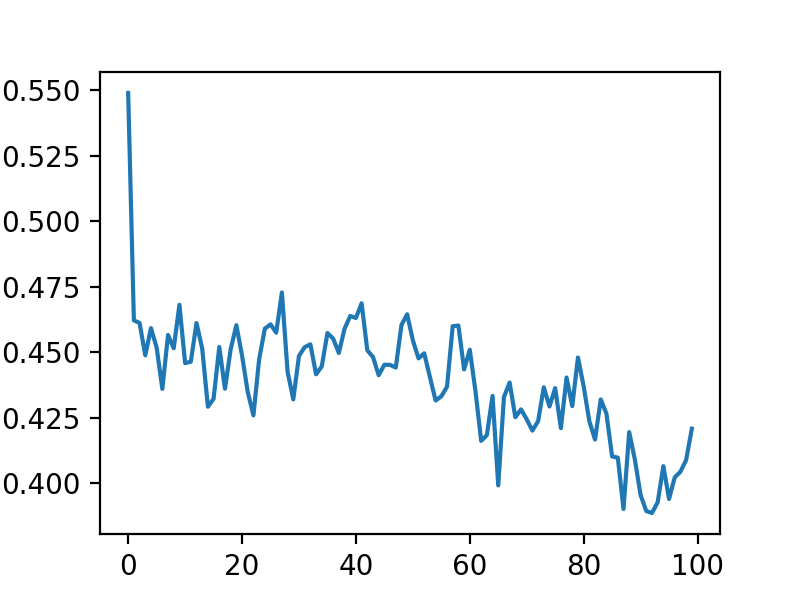

In [10]:
# 128X128, dx=1, dt=0.04 iter = 10**5, v=0.0375, lamda = 2, CN(operator)+FE, rep1
from scipy import stats
steps = 100
slopes = np.zeros(steps)
for i in range(steps):
    v_array = v_matrix[i,:]
    res = stats.linregress(np.log2(l_array[1:4]-1), np.log2(v_array[1:4]))
    slopes[i] = res.slope/2
print(np.mean(slopes))
print(np.std(slopes))
plt.figure(figsize=[4,3])
plt.plot(range(steps),slopes)
plt.show()

0.4157572065112752
0.024759058989725757


<IPython.core.display.Javascript object>


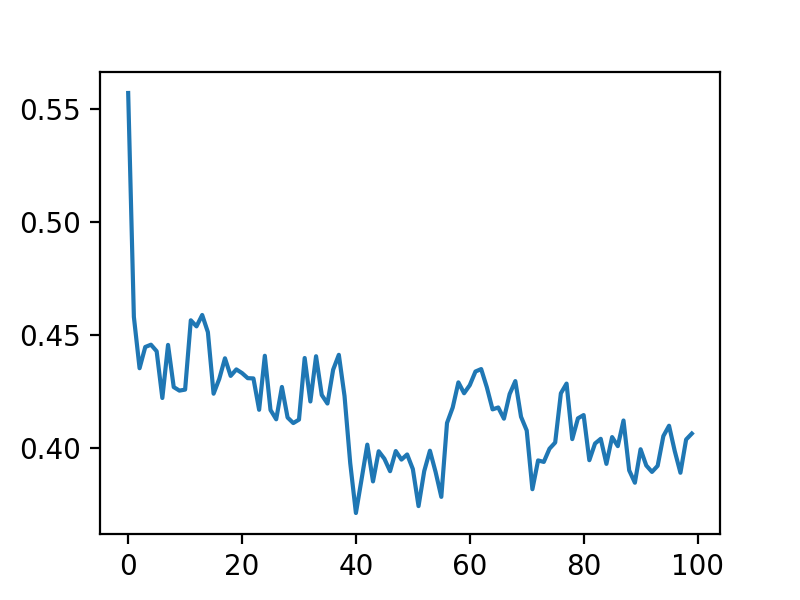

In [23]:
# 128X128, dx=1, dt=0.04 iter = 10**5, v=0.0375, lamda = 2, CN(operator)+FE, rep2
from scipy import stats
steps = 100
slopes = np.zeros(steps)
for i in range(steps):
    v_array = v_matrix[i,:]
    res = stats.linregress(np.log2(l_array[1:4]-1), np.log2(v_array[1:4]))
    slopes[i] = res.slope/2
print(np.mean(slopes))
print(np.std(slopes))
plt.figure(figsize=[4,3])
plt.plot(range(steps),slopes)
plt.show()

0.42429224673726823
0.023010931223313876


<IPython.core.display.Javascript object>


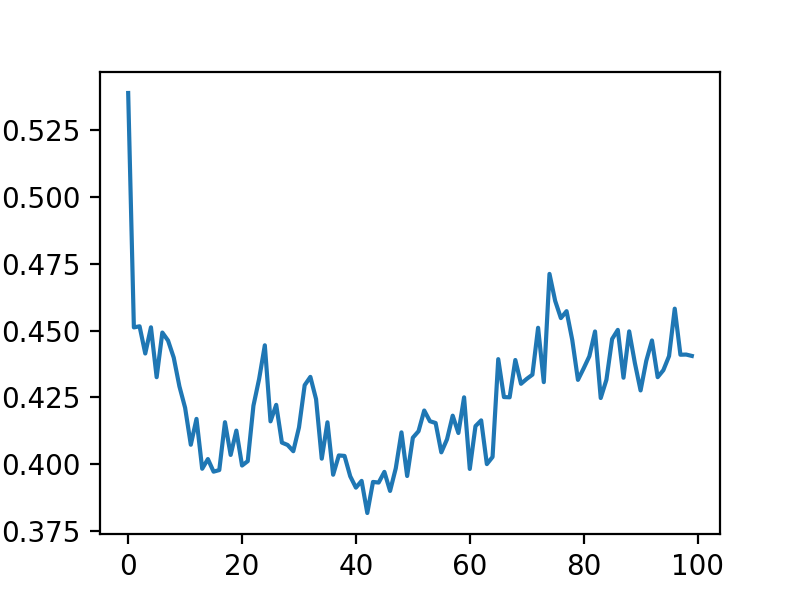

In [31]:
# 128X128, dx=1, dt=0.04 iter = 10**5, v=0.0375, lamda = 2, CN(operator)+FE, rep3
from scipy import stats
steps = 100
slopes = np.zeros(steps)
for i in range(steps):
    v_array = v_matrix[i,:]
    res = stats.linregress(np.log2(l_array[1:4]-1), np.log2(v_array[1:4]))
    slopes[i] = res.slope/2
print(np.mean(slopes))
print(np.std(slopes))
plt.figure(figsize=[4,3])
plt.plot(range(steps),slopes)
plt.show()

<IPython.core.display.Javascript object>


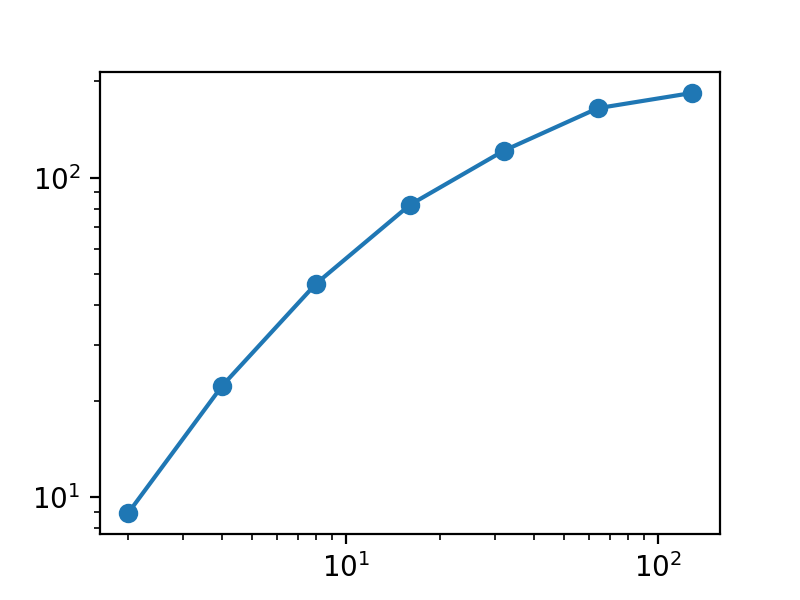

In [25]:
# var vs sample size, expect a power law relationship, i.e., a linear plot in log-log scale
plt.figure(figsize=[4,3])
v_mean = [np.mean(v_matrix[50:,i]) for i in range(l_max-1)]
plt.loglog(l_array,v_mean)
plt.scatter(l_array,v_mean)
plt.show()

<IPython.core.display.Javascript object>


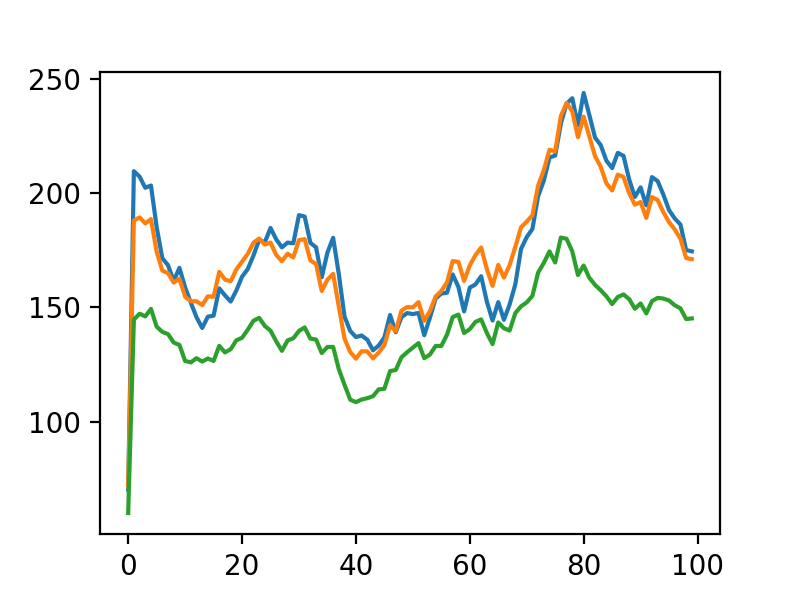

In [32]:
# var vs time
plt.figure(figsize=[4,3])
plt.plot(range(steps),v_matrix[:,-1])
plt.plot(range(steps),v_matrix[:,-2])
plt.plot(range(steps),v_matrix[:,-3])
plt.show()

<IPython.core.display.Javascript object>


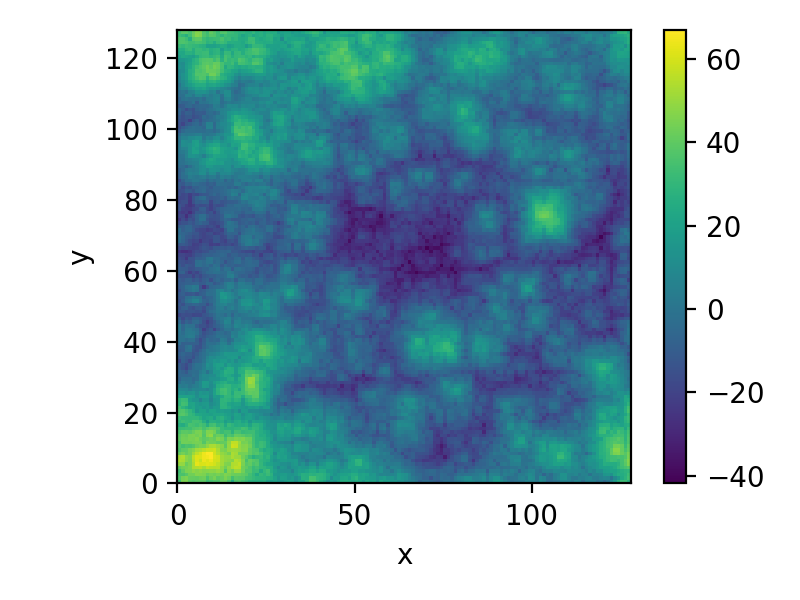

In [28]:
plot_2D_field(xm,ym,u.data)